# Manual core depth picking

In [1]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.colors import LinearSegmentedColormap
# %matplotlib inline

# Image handling
import os
from PIL import Image

# Utilities
import warnings
warnings.filterwarnings('ignore')


<hr>

### Test with Cascadia hi-res MS logs

In [2]:
def plot_core_data(md, log, title, rgb_img=None, ct_img=None, boundaries=None, figsize=(20, 4), label_name=None):
    """
    Plot core data with optional RGB and CT images and turbidite boundaries.
    
    Parameters:
    - md: array of depth values
    - log: array of log values (should be normalized)
    - title: title for the plot
    - rgb_img: optional RGB image array
    - ct_img: optional CT image array
    - boundaries: optional array of depth points for marking boundaries
    - figsize: figure size tuple (width, height)
    - label_name: optional name for the log curve label
    
    Returns:
    - fig: the created figure
    """
    if rgb_img is not None and ct_img is not None:
        # Create figure with three subplots if both RGB and CT images are provided
        fig, axs = plt.subplots(3, 1, figsize=figsize, gridspec_kw={'height_ratios': [1, 1, 2]})
        
        # RGB image - flipping x & y axes
        axs[0].imshow(rgb_img.transpose(1, 0, 2), aspect='auto', extent=[md[0], md[-1], 0, 1])
        axs[0].set_ylabel('RGB')
        axs[0].set_xticks([])  # Hide x-axis ticks for top plots
        axs[0].set_yticks([])  # Hide y-axis ticks for image
        
        # CT image - flipping x & y axes
        axs[1].imshow(ct_img.transpose(1, 0, 2) if len(ct_img.shape) == 3 else 
                      ct_img.transpose(), aspect='auto', extent=[md[0], md[-1], 0, 1], cmap='gray')
        axs[1].set_ylabel('CT')
        axs[1].set_xticks([])  # Hide x-axis ticks for middle plot
        axs[1].set_yticks([])  # Hide y-axis ticks for image
        
        # Log curve
        axs[2].plot(md, log, label=label_name, linewidth=0.7)
        axs[2].set_ylim(0, 1)
        axs[2].set_xlim(md[0], md[-1])
        axs[2].set_xlabel('depth (cm)')
        axs[2].set_ylabel('Normalized Intensity')
        if label_name is not None:
            axs[2].legend(loc='upper left')
        
        # Add boundaries if provided
        if boundaries is not None:
            count = 1
            for i in range(len(boundaries)):
                axs[2].axvline(x=boundaries[i], color='k', linestyle='--')
                axs[2].text(boundaries[i], 0.9, str(count), fontsize=12, fontweight='bold')
                count += 1
    
    elif rgb_img is not None:
        # Create figure with two subplots if only RGB image is provided
        fig, axs = plt.subplots(2, 1, figsize=figsize, gridspec_kw={'height_ratios': [1, 2]})
        
        # RGB image - flipping x & y axes
        axs[0].imshow(rgb_img.transpose(1, 0, 2), aspect='auto', extent=[md[0], md[-1], 0, 1])
        axs[0].set_ylabel('RGB')
        axs[0].set_xticks([])  # Hide x-axis ticks for top plots
        axs[0].set_yticks([])  # Hide y-axis ticks for image
        
        # Log curve
        axs[1].plot(md, log, label=label_name, linewidth=0.7)
        axs[1].set_ylim(0, 1)
        axs[1].set_xlim(md[0], md[-1])
        axs[1].set_xlabel('depth (cm)')
        axs[1].set_ylabel('Normalized Intensity')
        if label_name is not None:
            axs[1].legend(loc='upper left')
        
        # Add boundaries if provided
        if boundaries is not None:
            count = 1
            for i in range(len(boundaries)):
                axs[1].axvline(x=boundaries[i], color='k', linestyle='--')
                axs[1].text(boundaries[i], 0.9, str(count), fontsize=12, fontweight='bold')
                count += 1
    
    elif ct_img is not None:
        # Create figure with two subplots if only CT image is provided
        fig, axs = plt.subplots(2, 1, figsize=figsize, gridspec_kw={'height_ratios': [1, 2]})
        
        # CT image - flipping x & y axes
        axs[0].imshow(ct_img.transpose(1, 0, 2) if len(ct_img.shape) == 3 else 
                      ct_img.transpose(), aspect='auto', extent=[md[0], md[-1], 0, 1], cmap='gray')
        axs[0].set_ylabel('CT')
        axs[0].set_xticks([])  # Hide x-axis ticks for top plots
        axs[0].set_yticks([])  # Hide y-axis ticks for image
        
        # Log curve
        axs[1].plot(md, log, label=label_name, linewidth=0.7)
        axs[1].set_ylim(0, 1)
        axs[1].set_xlim(md[0], md[-1])
        axs[1].set_xlabel('depth (cm)')
        axs[1].set_ylabel('Normalized Intensity')
        if label_name is not None:
            axs[1].legend(loc='upper left')
        
        # Add boundaries if provided
        if boundaries is not None:
            count = 1
            for i in range(len(boundaries)):
                axs[1].axvline(x=boundaries[i], color='k', linestyle='--')
                axs[1].text(boundaries[i], 0.9, str(count), fontsize=12, fontweight='bold')
                count += 1
    
    else:
        # Create figure with single subplot if no images
        fig, ax = plt.subplots(figsize=figsize)
        
        # Log curve
        ax.plot(md, log, label=label_name, linewidth=0.7)
        ax.set_ylim(0, 1)
        ax.set_xlim(md[0], md[-1])
        ax.set_xlabel('depth (cm)')
        ax.set_ylabel('Normalized Intensity')
        if label_name is not None:
            ax.legend(loc='upper left')
        
        # Add boundaries if provided
        if boundaries is not None:
            count = 1
            for i in range(len(boundaries)):
                ax.axvline(x=boundaries[i], color='r')
                ax.text(boundaries[i], 0.2, str(count))
                count += 1
    
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    
    return fig

### Define core pairs

In [3]:
# Define core names as variables for easy reference
# CORE_A = "M9907-22PC"
# CORE_B = "M9907-23PC"
CORE_A = "M9907-23PC"
CORE_B = "M9907-25PC"

#### Data structures and core images

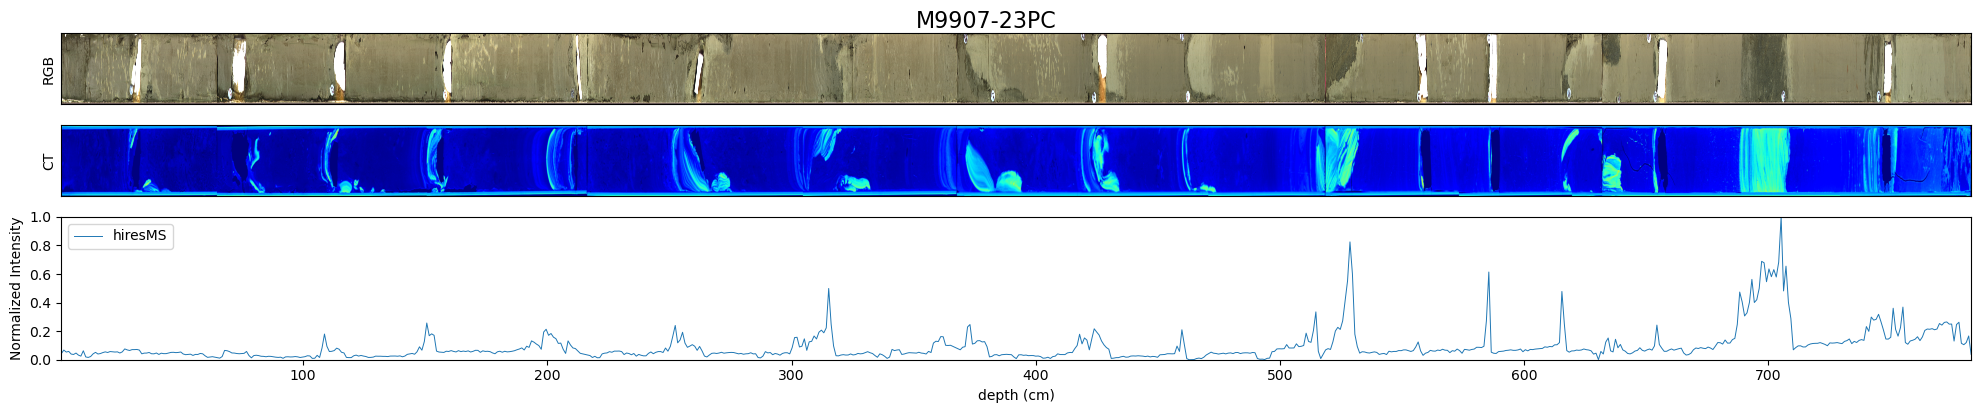

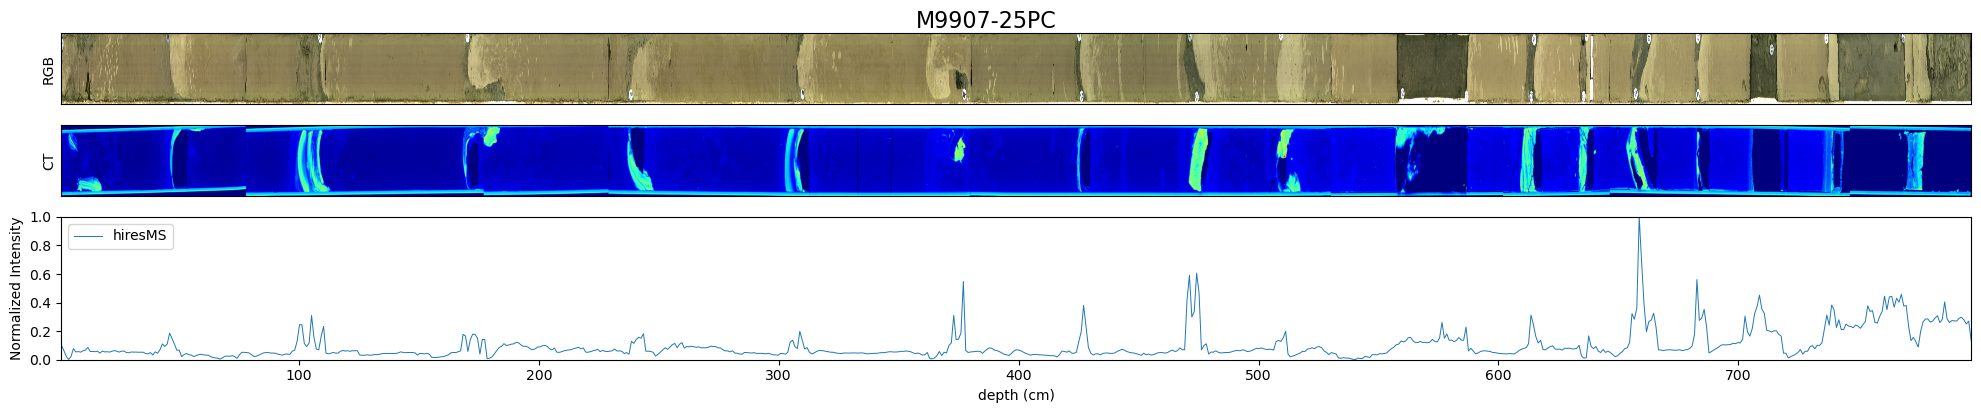

In [4]:
# Define column names to extract from each dataset
LOG_COLUMNS = 'hiresMS'
DEPTH_COLUMN = 'SB_DEPTH_cm'

# Define directory paths
mother_dir = 'OSU_dataset/'

# Extract data for core A
core_a_path = f'{mother_dir}_compiled_logs/{CORE_A}/ML_filled/{CORE_A}_{LOG_COLUMNS}_MLfilled.csv'
rgb_img_path_a = mother_dir + '_compiled_logs/' + CORE_A + '/' + CORE_A + '_RGB.tiff'
ct_img_path_a = mother_dir + '_compiled_logs/' + CORE_A + '/' + CORE_A + '_CT.tiff'

# Load images for core A
rgb_img_a = plt.imread(rgb_img_path_a)
ct_img_a = plt.imread(ct_img_path_a)

# Load log data for core A
df = pd.read_csv(core_a_path)
log_a = np.array(df[LOG_COLUMNS])
log_a = (log_a - np.min(log_a)) / (np.max(log_a) - np.min(log_a))  # normalize log_a to between 0 and 1
md_a = np.array(df[DEPTH_COLUMN]) #measured depth



# Extract data for core B
core_b_path = f'{mother_dir}_compiled_logs/{CORE_B}/ML_filled/{CORE_B}_{LOG_COLUMNS}_MLfilled.csv'
rgb_img_path_b = mother_dir + '_compiled_logs/' + CORE_B + '/' + CORE_B + '_RGB.tiff'
ct_img_path_b = mother_dir + '_compiled_logs/' + CORE_B + '/' + CORE_B + '_CT.tiff'

# Load images for core B
rgb_img_b = plt.imread(rgb_img_path_b)
ct_img_b = plt.imread(ct_img_path_b)

# Load log data for core B
df = pd.read_csv(core_b_path)
log_b = np.array(df[LOG_COLUMNS])
log_b = (log_b - np.min(log_b)) / (np.max(log_b) - np.min(log_b))  # normalize log_b to between 0 and 1
md_b = np.array(df[DEPTH_COLUMN]) #measured depth

%matplotlib inline

# Plot Core A with RGB image, CT image, and log curve
plot_core_data(md_a, log_a, CORE_A,  rgb_img=rgb_img_a, ct_img=ct_img_a, label_name=LOG_COLUMNS)
plt.show()

# Plot Core B with RGB image and log curve
plot_core_data(md_b, log_b, CORE_B, rgb_img=rgb_img_b, ct_img=ct_img_b, label_name=LOG_COLUMNS)
plt.show()


##### Manual picking for the correlation levels

In [5]:
# Enable the interactive widget backend
def onclick_boundary(event, xs, lines, ax, toolbar, categories, current_category):
    """
    Handle mouse click events: left-click to add x value and vertical line
    Only active when toolbar is not being used
    """
    if event.inaxes == ax and event.name == 'button_press_event':
        # Check if any toolbar buttons are active
        if toolbar.mode == '' and not selection_complete[0]:  # No buttons pressed and selection not complete
            if event.button == 1:  # Left mouse button
                x1 = event.xdata
                xs.append(x1)
                categories.append(current_category[0])
                # Add a vertical red dashed line at the clicked x position
                # Use different colors based on category
                color = get_category_color(current_category[0])
                line = ax.axvline(x=x1, color=color, linestyle='--')
                lines.append(line)
                ax.figure.canvas.draw_idle()
                print(f'Added x={x1:.2f}, Category={current_category[0]}')

def get_category_color(category):
    """Return a color based on the category number"""
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    # Convert category to a hash value if it's a string
    if isinstance(category, str):
        category_hash = sum(ord(c) for c in category)
        return colors[category_hash % len(colors)]
    else:
        return colors[category % len(colors)]

def onkey_boundary(event, xs, lines, ax, cid, toolbar, categories, current_category):
    """
    Handle keyboard events: delete to remove last point, enter to finish, numbers 0-9 to change category
    """
    if event.key and event.key in '0123456789':  # Check if key is a digit between 0-9
        # Change the current category
        current_category[0] = event.key
        print(f'Changed to Category {current_category[0]}')
    elif event.key in ('delete', 'backspace'):
        if xs and not selection_complete[0]:
            removed_x = xs.pop()
            removed_category = categories.pop()
            removed_line = lines.pop()
            removed_line.remove()  # Remove the line from the plot
            ax.figure.canvas.draw_idle()
            print(f'Removed x={removed_x:.2f}, Category={removed_category}')
        else:
            print('No points to remove.')
    elif event.key == 'enter':
        # Sort the picked depths and categories based on depth values (smallest to highest)
        if xs and categories:
            sorted_pairs = sorted(zip(xs, categories), key=lambda pair: (pair[1], pair[0]))
            xs[:] = [pair[0] for pair in sorted_pairs]
            categories[:] = [pair[1] for pair in sorted_pairs]
        # Disconnect the event handlers
        fig.canvas.mpl_disconnect(cid[0])
        fig.canvas.mpl_disconnect(cid[1])
        selection_complete[0] = True
        ax.set_title("Selection Completed")
        print('Finished selecting points. Selection is now locked.')
        
        # Export to CSV if requested when Enter is pressed (now using the sorted values)
        if export_csv_flag[0] and xs:
            export_picked_depths(xs, categories, core_name_global[0])

def create_interactive_figure(md, log, rgb_img=None, ct_img=None, miny=0, maxy=1):
    """
    Create an interactive plot with RGB image, CT image, and log curve.

    :param md: List or array for x-axis data
    :param log: List or array for y-axis data
    :param rgb_img: RGB image data (optional)
    :param ct_img: CT image data (optional)
    :param miny: Minimum y-axis limit
    :param maxy: Maximum y-axis limit
    :return: Matplotlib figure and axes objects
    """
    if rgb_img is not None and ct_img is not None and not isinstance(ct_img, str):
        # Create figure with three subplots if both RGB and CT images are provided
        fig, axs = plt.subplots(3, 1, figsize=(20, 5.5), gridspec_kw={'height_ratios': [1, 1, 2]})
        
        # RGB image - flipping x & y axes
        axs[0].imshow(rgb_img.transpose(1, 0, 2), aspect='auto', extent=[md[0], md[-1], 0, 1])
        axs[0].set_ylabel('RGB')
        axs[0].set_xticks([])  # Hide x-axis ticks for top plots
        axs[0].set_yticks([])  # Hide y-axis ticks for image
        
        # CT image - flipping x & y axes
        axs[1].imshow(ct_img.transpose(1, 0, 2) if len(ct_img.shape) == 3 else 
                      ct_img.transpose(), aspect='auto', extent=[md[0], md[-1], 0, 1], cmap='gray')
        axs[1].set_ylabel('CT')
        axs[1].set_xticks([])  # Hide x-axis ticks for middle plot
        axs[1].set_yticks([])  # Hide y-axis ticks for image
        
        # Log curve
        axs[2].plot(md, log, linestyle='-', linewidth=0.7)  # Using thinner line width of 0.7
        axs[2].set_ylim(miny, maxy)
        axs[2].set_xlim(md[0], md[-1])
        axs[2].set_xlabel('depth (cm)')
        axs[2].set_ylabel('Normalized Intensity')
        axs[2].set_title('Interactive Selection: `Left-Click` to Add, `Delete/Backspace` to Remove, `Enter/Return` to Finish')
        
        plt.tight_layout()
        return fig, axs[2]  # Return the log plot axis for interaction
    
    elif rgb_img is not None:
        # Create figure with two subplots if only RGB image is provided
        fig, axs = plt.subplots(2, 1, figsize=(20, 4), gridspec_kw={'height_ratios': [1, 2]})
        
        # RGB image - flipping x & y axes
        axs[0].imshow(rgb_img.transpose(1, 0, 2), aspect='auto', extent=[md[0], md[-1], 0, 1])
        axs[0].set_ylabel('RGB')
        axs[0].set_xticks([])  # Hide x-axis ticks for top plots
        axs[0].set_yticks([])  # Hide y-axis ticks for image
        
        # Log curve
        axs[1].plot(md, log, linestyle='-', linewidth=0.7)  # Using thinner line width of 0.7
        axs[1].set_ylim(miny, maxy)
        axs[1].set_xlim(md[0], md[-1])
        axs[1].set_xlabel('depth (cm)')
        axs[1].set_ylabel('Normalized Intensity')
        axs[1].set_title('Interactive Selection: `Left-Click` to Add, `Delete/Backspace` to Remove, `Enter/Return` to Finish')
        
        plt.tight_layout()
        return fig, axs[1]  # Return the log plot axis for interaction
    
    elif ct_img is not None and not isinstance(ct_img, str):
        # Create figure with two subplots if only CT image is provided
        fig, axs = plt.subplots(2, 1, figsize=(20, 4), gridspec_kw={'height_ratios': [1, 2]})
        
        # CT image - flipping x & y axes
        axs[0].imshow(ct_img.transpose(1, 0, 2) if len(ct_img.shape) == 3 else 
                      ct_img.transpose(), aspect='auto', extent=[md[0], md[-1], 0, 1], cmap='gray')
        axs[0].set_ylabel('CT')
        axs[0].set_xticks([])  # Hide x-axis ticks for top plots
        axs[0].set_yticks([])  # Hide y-axis ticks for image
        
        # Log curve
        axs[1].plot(md, log, linestyle='-', linewidth=0.7)  # Using thinner line width of 0.7
        axs[1].set_ylim(miny, maxy)
        axs[1].set_xlim(md[0], md[-1])
        axs[1].set_xlabel('depth (cm)')
        axs[1].set_ylabel('Normalized Intensity')
        axs[1].set_title('Interactive Selection: `Left-Click` to Add, `Delete/Backspace` to Remove, `Enter/Return` to Finish')
        
        plt.tight_layout()
        return fig, axs[1]  # Return the log plot axis for interaction
    
    else:
        # Create figure with single subplot if no images or if ct_img is a string
        fig, ax = plt.subplots(figsize=(20, 2.5))
        
        # Log curve
        ax.plot(md, log, linestyle='-', linewidth=0.7)  # Using thinner line width of 0.7
        ax.set_ylim(miny, maxy)
        ax.set_xlim(md[0], md[-1])
        ax.set_xlabel('depth (cm)')
        ax.set_ylabel('Normalized Intensity')
        ax.set_title('Interactive Selection: `Left-Click` to Add, `Delete/Backspace` to Remove, `Enter/Return` to Finish')
        
        plt.tight_layout()
        return fig, ax  # Return the log plot axis for interaction

# Function to export picked depths to CSV
def export_picked_depths(depths, categories, core_name):
    """
    Export picked stratigraphic levels to a CSV file.
    
    :param depths: List of picked depth values
    :param categories: List of categories for each depth
    :param core_name: Name of the core for the filename
    :return: Filename of the saved CSV
    """
    # Create DataFrame with picked depths and categories
    df = pd.DataFrame({
        'picked_depths_cm': depths,
        'category': categories
    })
    
    # Define filename
    filename = f"{core_name}_pickeddepth.csv"
    
    # Save to CSV
    df.to_csv(filename, index=False)
    print(f"Saved {len(depths)} picked depths to {filename}")

# Define a function to create interactive plot for picking stratigraphic levels
def pick_stratigraphic_levels(md, log, rgb_img=None, ct_img=None, core_name="", log_column_name="", export_csv=False):
    """
    Create an interactive plot for picking stratigraphic levels.
    
    :param md: List or array for x-axis data
    :param log: List or array for y-axis data
    :param rgb_img: RGB image data (optional)
    :param ct_img: CT image data (optional)
    :param core_name: Name of the core for display
    :param log_column_name: Name of the log column for display
    :param export_csv: Boolean flag to export picked depths to CSV when finished
    :return: Tuple of (picked depth values, categories)
    """
    global fig, selection_complete, export_csv_flag, core_name_global
    
    # Create figure and axes
    fig, ax = create_interactive_figure(md, log, rgb_img, ct_img, 0, 1)
    
    # Lists to store picked values, lines, and categories
    xs = []
    lines = []
    categories = []
    current_category = ['1']  # Default category is '1'
    selection_complete = [False]
    export_csv_flag = [export_csv]
    core_name_global = [core_name]
    
    # Get the toolbar instance
    toolbar = fig.canvas.toolbar
    
    # Connect both click and keyboard events to their handlers
    cid = [
        fig.canvas.mpl_connect('button_press_event', 
                              lambda event: onclick_boundary(event, xs, lines, ax, toolbar, categories, current_category)),
        fig.canvas.mpl_connect('key_press_event', 
                              lambda event: onkey_boundary(event, xs, lines, ax, cid, toolbar, categories, current_category))
    ]
    
    # Display instructions
    print("Instructions:")
    print(" - Press any number key (0-9) to change the category of subsequent selections. The default category is set to '1'")
    print(" - Left-click on the plot to select and save an x-value.")
    print(" - Press Delete/Backspace to undo the last selection.")
    print(" - Press Enter when finished selecting points.")
    print(" - Pan and Zoom tools will temporarily disable point selection.")
    if export_csv:
        print(" - [export_csv=True]: Picked depths will be saved to a CSV file when finished.")
    
    fig.suptitle(f'{core_name}', fontsize=16, y=1.02)
    plt.show()
    
    # Return the picked (and sorted) values
    return xs, categories


Please pick stratigraphic levels for M9907-23PC
Instructions:
 - Press any number key (0-9) to change the category of subsequent selections. The default category is set to '1'
 - Left-click on the plot to select and save an x-value.
 - Press Delete/Backspace to undo the last selection.
 - Press Enter when finished selecting points.
 - Pan and Zoom tools will temporarily disable point selection.
 - [export_csv=True]: Picked depths will be saved to a CSV file when finished.


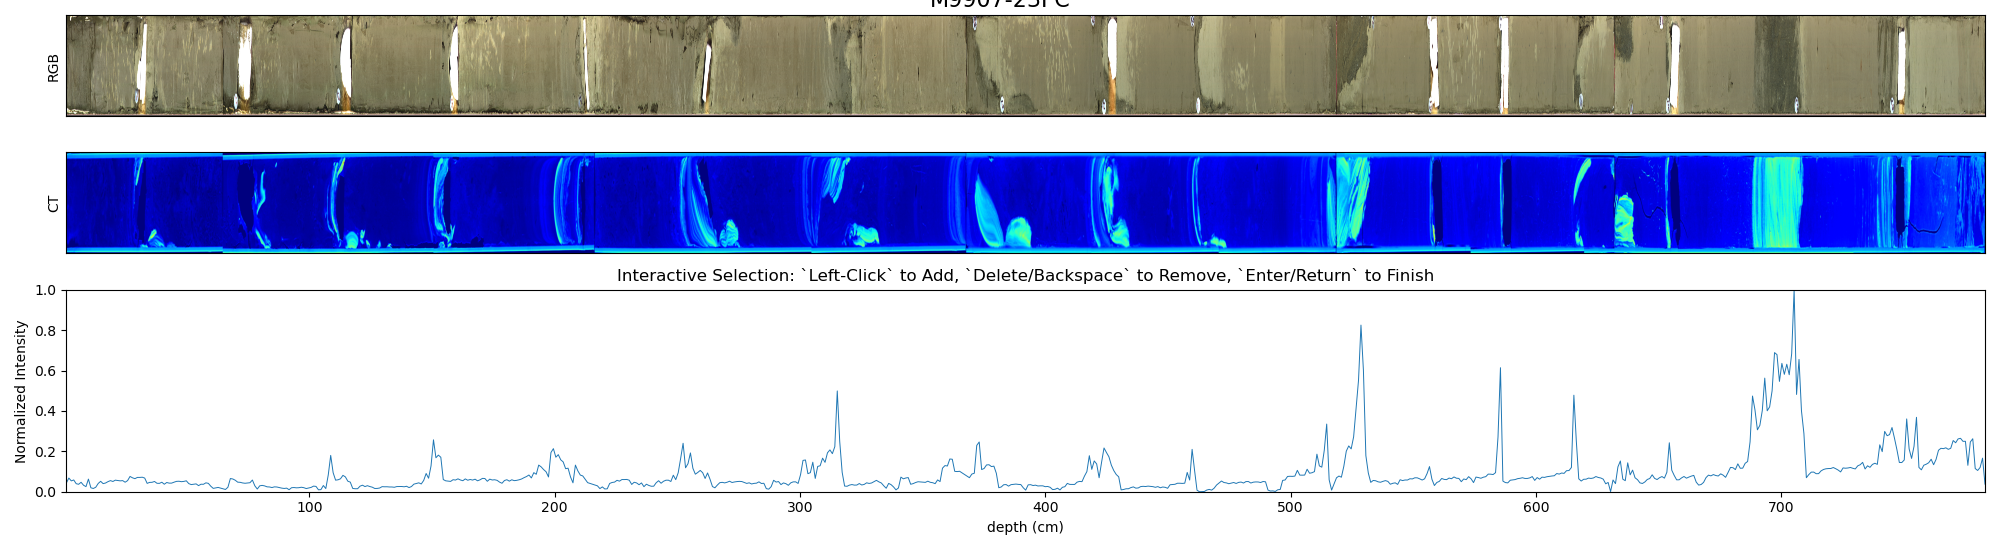

Added x=118.63, Category=1
Added x=173.65, Category=1
Added x=246.20, Category=1


In [11]:
%matplotlib widget 
# should install ipympl

# Pick stratigraphic levels for Core A
print(f"Please pick stratigraphic levels for {CORE_A}")
picked_depths_a, picked_categories_a = pick_stratigraphic_levels(md_a, log_a, rgb_img=rgb_img_a, ct_img=ct_img_a, core_name=CORE_A, log_column_name=LOG_COLUMNS, export_csv=True)


Please pick stratigraphic levels for M9907-25PC
Instructions:
 - Press any number key (0-9) to change the category of subsequent selections. The default category is set to '1'
 - Left-click on the plot to select and save an x-value.
 - Press Delete/Backspace to undo the last selection.
 - Press Enter when finished selecting points.
 - Pan and Zoom tools will temporarily disable point selection.
 - [export_csv=True]: Picked depths will be saved to a CSV file when finished.


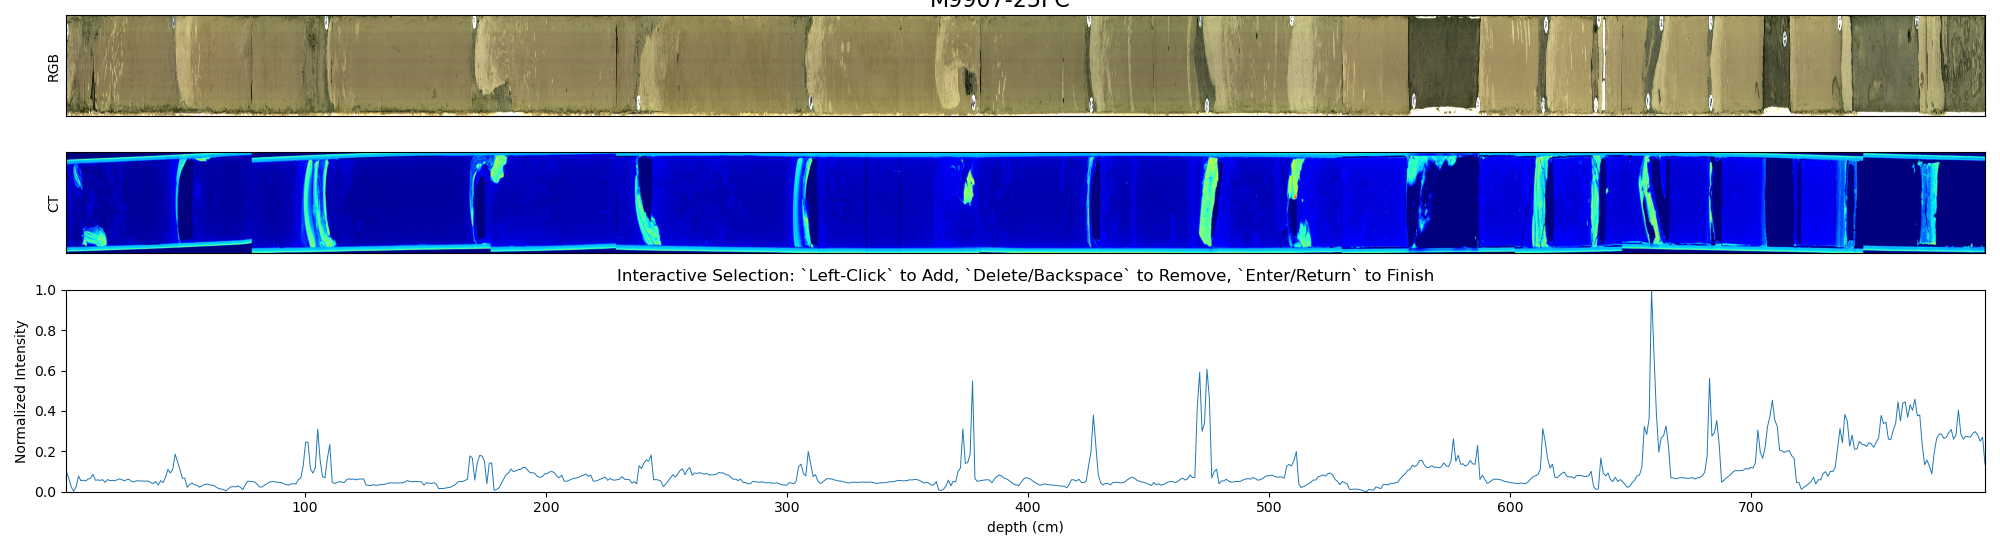

In [7]:
%matplotlib widget

# Pick stratigraphic levels for Core B
print(f"Please pick stratigraphic levels for {CORE_B}")
picked_depths_b, picked_categories_b = pick_stratigraphic_levels(md_b, log_b, rgb_img=rgb_img_b, ct_img=ct_img_b, core_name=CORE_B, log_column_name=LOG_COLUMNS, export_csv=True)

In [8]:
for csv_file in [f'{CORE_A}_pickeddepth.csv', f'{CORE_B}_pickeddepth.csv']:
    if os.path.exists(csv_file):
        df = pd.read_csv(csv_file)
        if not df.empty:
            # Convert columns to numeric types to ensure correct sorting
            df['category'] = pd.to_numeric(df['category'], errors='coerce')
            df['picked_depths_cm'] = pd.to_numeric(df['picked_depths_cm'], errors='coerce')
            # Optionally drop rows with conversion issues
            df = df.dropna(subset=['category', 'picked_depths_cm'])
            
            # Sort first by category, then by picked_depths_cm
            df_sorted = df.sort_values(by=['category', 'picked_depths_cm'])
            # Save the sorted DataFrame back to the CSV file without the index column
            df_sorted.to_csv(csv_file, index=False)
            print(f"Sorted and saved {csv_file} with {len(df_sorted)} records.")
        else:
            print(f"File {csv_file} is empty. Skipping sorting.")
    else:
        print(f"File {csv_file} not found.")


Sorted and saved M9907-23PC_pickeddepth.csv with 72 records.
Sorted and saved M9907-25PC_pickeddepth.csv with 67 records.


In [ ]:
%matplotlib inline

# Define paths to the CSV files
pickeddepth_a_csv = f'{CORE_A}_pickeddepth.csv'
pickeddepth_b_csv = f'{CORE_B}_pickeddepth.csv'

# Load picked depths and categories from CSV files
if os.path.exists(pickeddepth_b_csv):
    picked_data_b = pd.read_csv(pickeddepth_b_csv)
    # Combine depths and categories into tuples
    picked_b = list(zip(picked_data_b['picked_depths_cm'].values.tolist(), 
                        picked_data_b['category'].values.tolist()))
    print(f"Loaded {len(picked_b)} picked depths for {CORE_B}")
else:
    print(f"Warning: {pickeddepth_b_csv} not found. Using empty list for picked_b.")
    picked_b = []

if os.path.exists(pickeddepth_a_csv):
    picked_data_a = pd.read_csv(pickeddepth_a_csv)
    # Combine depths and categories into tuples
    picked_a = list(zip(picked_data_a['picked_depths_cm'].values.tolist(), 
                        picked_data_a['category'].values.tolist()))
    print(f"Loaded {len(picked_a)} picked depths for {CORE_A}")
else:
    print(f"Warning: {pickeddepth_a_csv} not found. Using empty list for picked_a.")
    picked_a = []

# Create uncertainty arrays (assuming uncertainty size is 2 cm)
picked_uncertainty_b = [1] * len(picked_b)
picked_uncertainty_a = [1] * len(picked_a)

# Define colors for different categories
category_colors = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'purple',
    5: 'orange',
    6: 'cyan',
    7: 'magenta',
    8: 'yellow',
    9: 'black'
}

# Plot Core A with picked boundaries colored by category
fig_a = plot_core_data(md_a, log_a, f"{CORE_A} with Picked Boundaries", 
                       rgb_img=rgb_img_a, ct_img=ct_img_a,
                       figsize=(20, 4),
                      #  label_name=LOG_COLUMNS
                       )

# Add colored uncertainty shading and boundaries for Core A
for (depth, category), uncertainty in zip(picked_a, picked_uncertainty_a):
    color = category_colors.get(category, 'red')  # Default to red if category not in dictionary
    # Add transparent shading covering the uncertainty interval
    plt.axvspan(depth - uncertainty, depth + uncertainty, color=color, alpha=0.1)
    # Add the picked depth line on top
    plt.axvline(x=depth, color=color, linestyle='--', linewidth=1.2, 
                label=f'#{category}' if f'#{category}' not in plt.gca().get_legend_handles_labels()[1] else "")

# Add legend with unique category entries for Core A
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', ncol=len(by_label))
plt.title(f"{CORE_A} with {len(picked_a)} Picked Boundaries")

# Plot Core B with picked boundaries colored by category
fig_b = plot_core_data(md_b, log_b, f"{CORE_B} with Picked Boundaries", 
                       rgb_img=rgb_img_b, ct_img=ct_img_b,
                       figsize=(20, 4),
                      #  label_name=LOG_COLUMNS
                       )

# Add colored uncertainty shading and boundaries for Core B
for (depth, category), uncertainty in zip(picked_b, picked_uncertainty_b):
    color = category_colors.get(category, 'red')  # Default to red if category not in dictionary
    # Add transparent shading covering the uncertainty interval
    plt.axvspan(depth - uncertainty, depth + uncertainty, color=color, alpha=0.2)
    # Add the picked depth line on top
    plt.axvline(x=depth, color=color, linestyle='--', linewidth=1.2, 
                label=f'#{category}' if f'#{category}' not in plt.gca().get_legend_handles_labels()[1] else "")

# Add legend with unique category entries for Core B
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', ncol=len(by_label))
plt.title(f"{CORE_B} with {len(picked_b)} Picked Boundaries")

plt.tight_layout()
plt.show()


Added x=60.34, Category=1
